<a href="https://colab.research.google.com/github/akhileshmanukonda/bert-model/blob/main/reasearch_ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research and analysis of a Bert pretrained model**
bert means bidectional encoder representations tranformer this performance the NLP tasks by using models and handling the training validation and prediction by a trainer from hugging face. in this vision importing a model from huggingface and doing EDA analysis and preprocessing and predicting analysis.

In [2]:
#installinng transformers
pip install transformers

In [4]:
#installing torch for doing training and preprocessing
pip install torch

In [5]:
#Installing datasets from huggingface
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [7]:
from transformers import pipeline
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification

model_name = "bert-base-cased"
# Use AutoModelForSequenceClassification for text classification tasks
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

classifier(
    [
        "jake broke the vase",

    ]
)
sequences = [
    "jake broke the vase\n\nThe vise. This is really a great idea for the Vise\
    I have tried to create and I'm really hoping to see it being incorporated into the Vise."]
batch = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")

batch["labels"] = torch.tensor([1])

optimizer = AdamW(model.parameters())
loss = model(**batch).loss
loss.backward()
optimizer.step()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [8]:
#load dataset
from datasets import load_dataset

ds = load_dataset("liuyanchen1015/MULTI_VALUE_mrpc_for_to")
print (ds)


from datasets import load_dataset

# Load the dataset
dataset = load_dataset("liuyanchen1015/MULTI_VALUE_mrpc_for_to")

# Convert to pandas DataFrame for easier manipulation
train_df = dataset['train'].to_pandas()
test_df = dataset['test'].to_pandas()


Generating train split:   0%|          | 0/1106 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/134 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/514 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'value_score'],
        num_rows: 1106
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'value_score'],
        num_rows: 134
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'value_score'],
        num_rows: 514
    })
})


# **Exploratory Data Analysis**
after loading data. i'm trying to explore the data how it seems. for that firstly i described the data and plotted distribution of labels for count and label. and in dataset there is two swentences so i found which is the maximum and minimum that are having in dataset.

In [9]:
# Display the first few rows of the training set
print(train_df.head())

# Display basic information about the training set
print(train_df.info())

# Check for missing values
print(train_df.isnull().sum())


                                           sentence1  \
0  Around 0335 GMT , Tab shares were up 19 cents ...   
1  The stock rose $ 2.11 , or about 11 percent , ...   
2  Legislation making it harder for consumers for...   
3  He told The Sun newspaper that Mr. Hussein 's ...   
4  Gyorgy Heizler , head of the local disaster un...   

                                           sentence2  label  idx  value_score  
0  Tab shares jumped 20 cents , or 4.6 % , for to...      0    3            1  
1  PG & E Corp. shares jumped $ 1.63 or 8 percent...      1    4            1  
2  Legislation making it harder for consumers for...      0   11            2  
3  " Saddam 's daughters had British schools and ...      1   14            2  
4  The head of the local disaster unit , Gyorgy H...      0   15            1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  --

In [10]:
# Get descriptive statistics for the dataset
print(train_df.describe())

# Check the distribution of the labels
print(train_df['label'].value_counts())


             label          idx  value_score
count  1106.000000  1106.000000  1106.000000
mean      0.716094  1993.498192     1.847197
std       0.451096  1157.622656     0.858904
min       0.000000     3.000000     1.000000
25%       0.000000  1027.500000     1.000000
50%       1.000000  1942.500000     2.000000
75%       1.000000  2977.500000     2.000000
max       1.000000  4073.000000     6.000000
label
1    792
0    314
Name: count, dtype: int64


<ipython-input-62-2a0d35426621>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_df, palette='viridis')


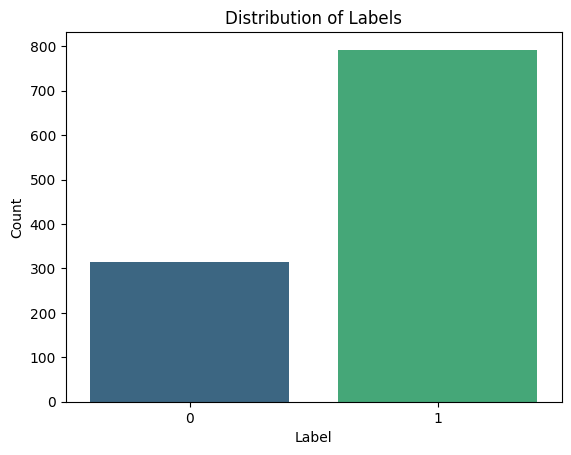

In [62]:
#plotting distribution of labels of traindata and counting it
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the labels
sns.countplot(x='label', data=train_df, palette='viridis')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()


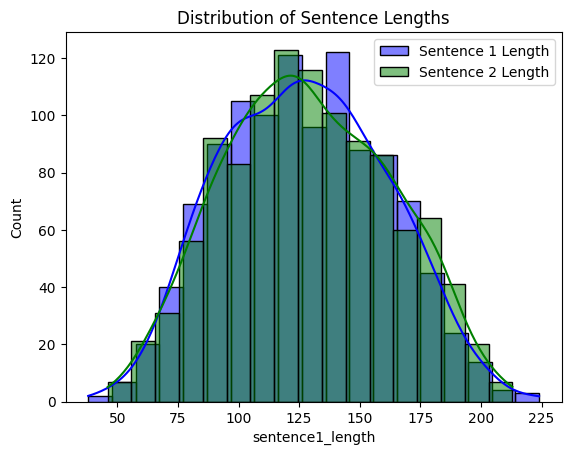

In [12]:
# Calculate the length of each sentence
train_df['sentence1_length'] = train_df['sentence1'].apply(len)
train_df['sentence2_length'] = train_df['sentence2'].apply(len)

# Plot the distribution of sentence lengths
sns.histplot(train_df['sentence1_length'], kde=True, color='blue', label='Sentence 1 Length')
sns.histplot(train_df['sentence2_length'], kde=True, color='green', label='Sentence 2 Length')
plt.legend()
plt.title('Distribution of Sentence Lengths')
plt.show()


In [13]:
# Check for duplicate rows
duplicates = train_df.duplicated(subset=['sentence1', 'sentence2']).sum()
print(f"Number of duplicate sentence pairs: {duplicates}")


Number of duplicate sentence pairs: 0


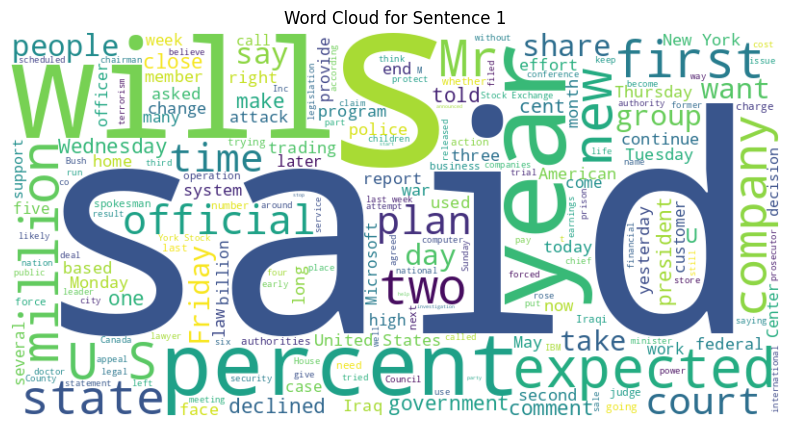

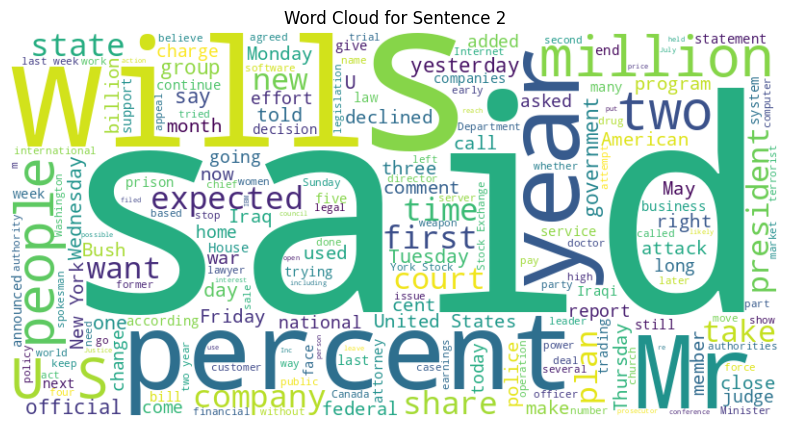

In [14]:
from wordcloud import WordCloud

# Generate a word cloud for the first sentences
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_df['sentence1']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Sentence 1')
plt.show()

# Generate a word cloud for the second sentences
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_df['sentence2']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Sentence 2')
plt.show()



# **preprocessing**
this is the important to prediction because the data having the sentence1 and sentence2 we couldnot directly train the data set for that we created tokens for the sentence1 and sentence2 and then encode the data as small inputs.

In [24]:
train_set = ds["train"]
train_set[0]
test_set = ds["test"]
test_set[0]
validation_set = ds["validation"]
validation_set[0]


train_set.features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 'idx': Value(dtype='int64', id=None),
 'value_score': Value(dtype='int64', id=None)}

In [25]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
# Access the correct columns within the train_set Dataset
tokenized_sentences_1 = tokenizer(train_set["sentence1"])
tokenized_sentences_2 = tokenizer(train_set["sentence2"])

In [17]:
inputs = tokenizer('Around 0335 GMT , Tab shares was up 19 cents , or 4.4 % , at A $ 4.56 , having earlier set a record high of A $ 4.57 .',
 'Tab shares jumped 20 cents , or 4.6 % , to set a record closing high at A $ 4.57 .')
inputs

{'input_ids': [101, 2105, 6021, 19481, 13938, 2102, 1010, 21628, 6661, 2001, 2039, 2539, 16653, 1010, 2030, 1018, 1012, 1018, 1003, 1010, 2012, 1037, 1002, 1018, 1012, 5179, 1010, 2383, 3041, 2275, 1037, 2501, 2152, 1997, 1037, 1002, 1018, 1012, 5401, 1012, 102, 21628, 6661, 5598, 2322, 16653, 1010, 2030, 1018, 1012, 1020, 1003, 1010, 2000, 2275, 1037, 2501, 5494, 2152, 2012, 1037, 1002, 1018, 1012, 5401, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [26]:
tokenizer.convert_ids_to_tokens(inputs["input_ids"])

['[CLS]',
 'around',
 '03',
 '##35',
 'gm',
 '##t',
 ',',
 'tab',
 'shares',
 'was',
 'up',
 '19',
 'cents',
 ',',
 'or',
 '4',
 '.',
 '4',
 '%',
 ',',
 'at',
 'a',
 '$',
 '4',
 '.',
 '56',
 ',',
 'having',
 'earlier',
 'set',
 'a',
 'record',
 'high',
 'of',
 'a',
 '$',
 '4',
 '.',
 '57',
 '.',
 '[SEP]',
 'tab',
 'shares',
 'jumped',
 '20',
 'cents',
 ',',
 'or',
 '4',
 '.',
 '6',
 '%',
 ',',
 'to',
 'set',
 'a',
 'record',
 'closing',
 'high',
 'at',
 'a',
 '$',
 '4',
 '.',
 '57',
 '.',
 '[SEP]']

In [19]:
tokenized_dataset = tokenizer(
    train_set["sentence1"],
    train_set["sentence2"],
    padding=True,
    truncation=True,
)

def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

In [20]:
tokenized_datasets = train_set.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/1106 [00:00<?, ? examples/s]

Dataset({
    features: ['sentence1', 'sentence2', 'label', 'idx', 'value_score', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1106
})

# **Training and finetuning**
training arguments are defined from the trainer. it is used for the training and evaluation. by defau[link text](https://)lt it contains all the hyperparameters to train and finetuning.

In [21]:
#IMPORT TRAINING ARGUMENTS AND DICRECTORY FOR TRAININNG MODEL AND CHECKPOINTS
from transformers import TrainingArguments

training_args = TrainingArguments("test-trainer")


model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
# Assuming 'train_set' is your entire dataset, split it first
from datasets import DatasetDict


# Create a DatasetDict
tokenized_datasets = DatasetDict({
    'train': train_set,
    'validation': validation_set,
    'test': test_set
})

# Apply tokenization
tokenized_datasets = tokenized_datasets.map(tokenize_function, batched=True)
#
from transformers import Trainer
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
)

Map:   0%|          | 0/1106 [00:00<?, ? examples/s]

Map:   0%|          | 0/134 [00:00<?, ? examples/s]

Map:   0%|          | 0/514 [00:00<?, ? examples/s]

In [38]:
#ataking the index to the maximum value
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [40]:
#by using the trainer we train the  model fromm our train dataset
trainer.train()

Step,Training Loss


TrainOutput(global_step=417, training_loss=0.051184629078963394, metrics={'train_runtime': 96.6565, 'train_samples_per_second': 34.328, 'train_steps_per_second': 4.314, 'total_flos': 126245001027480.0, 'train_loss': 0.051184629078963394, 'epoch': 3.0})

In [41]:
#for the predictions we have a shape for that. so here is the code for the shape of the prediction
predictions = trainer.predict(tokenized_datasets["validation"])
print(predictions.predictions.shape, predictions.label_ids.shape)

(134, 2) (134,)


In [42]:
import numpy as np

preds = np.argmax(predictions.predictions, axis=-1)

## **evaluation** is a process for the prediction of metrics given to the dataset. we have metrics list in evaluation prediction from that i predicted accuarcy of my data

In [43]:
pip install evaluate

In [53]:
import evaluate

metric = evaluate.load("accuracy","liuyanchen1015/MULTI_VALUE_mrpc_for_to")
metric.compute(predictions=preds, references=predictions.label_ids)

{'accuracy': 0.835820895522388}